# Import af biblioteker  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Indlæsning af data

In [4]:
df = pd.read_csv('../data/Data_Train.csv')
df.sample(5)

,Airline,Date_of_Journey,Source,Dep_Time,Destination,Class,Price
5479,Jet Airways,3/05/2019,Banglore,11:10,Delhi,0,4030
10554,Jet Airways,6/06/2019,Delhi,05:30,Cochin,0,10368
6828,IndiGo,15/06/2019,Delhi,16:00,Cochin,0,6316
9505,IndiGo,27/06/2019,Delhi,11:25,Cochin,0,5684
6639,IndiGo,24/04/2019,Kolkata,19:20,Banglore,0,3480


Vi har importeret dataene og lavet en hurtig gennemgang for at få et overblik over datasættet. Nu går vi videre med at forberede og rense dataene, så de er klar til analyse.

# 2. Rensning af data

In [7]:
# Tjekker for manglende værdier
print("Tjekker for manglende værdier:")
print(df.isnull().sum())

# Tjekker for NaN-værdier
print("Tjekker for NaN-værdier:")
print(df.isna().sum())

# Tjekker for datatyper
print("Tjekker for datatyper:")
print(df.info())

# Tjekker for duplikater
print("Tjekker for duplikater:")
print(df.duplicated().sum()) 

Tjekker for manglende værdier:
Airline            0
Date_of_Journey    0
Source             0
Dep_Time           0
Destination        0
Class              0
Price              0
dtype: int64
Tjekker for NaN-værdier:
Airline            0
Date_of_Journey    0
Source             0
Dep_Time           0
Destination        0
Class              0
Price              0
dtype: int64
Tjekker for datatyper:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Dep_Time         10683 non-null  object
 4   Destination      10683 non-null  object
 5   Class            10683 non-null  int64 
 6   Price            10683 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 584.4+ KB
None
Tjekker for duplikater:
2001


In [8]:
# Finder alle rækker der er identiske med mindst en anden (keep=False viser ALLE forekomster)
fulde_duplikater = df[df.duplicated(keep=False)]

# Udskriver samlet antal duplikerede rækker
print("Antal fuldstændige duplikatrækker (inkl. kopier):", fulde_duplikater.shape[0])

# Viser et par eksempler på de duplikerede rækker
print("\nEksempler på duplikerede rækker:")
print(fulde_duplikater.head())

# Tæller hvor mange af disse er faktiske kopier (ikke første forekomst)
antal_egentlige_duplikater = df[df.duplicated(keep=False)].duplicated().sum()
print("\nAntal gentagelser (egentlige duplikater):", antal_egentlige_duplikater)

# Tjekker hvor mange unikke rækker er det der gentages?
unikke_rækker = fulde_duplikater.drop_duplicates()
print("Antal unikke rækker blandt de duplikerede:", unikke_rækker.shape[0])

# Eksempel 1: Række 2
print("\nForekomster af række 2:")
print(df[df.eq(df.loc[2]).all(axis=1)])

# Eksempel 2: Række 6
print("\nForekomster af række 6:")
print(df[df.eq(df.loc[6]).all(axis=1)])

Antal fuldstændige duplikatrækker (inkl. kopier): 3192

Eksempler på duplikerede rækker:
        Airline Date_of_Journey    Source Dep_Time Destination  Class  Price
2   Jet Airways       9/06/2019     Delhi    09:25      Cochin      0  13882
6   Jet Airways      12/03/2019  Banglore    18:55   New Delhi      0  11087
7   Jet Airways      01/03/2019  Banglore    08:00   New Delhi      0  22270
13  Jet Airways       9/05/2019   Kolkata    21:10    Banglore      0   9663
17  Jet Airways      12/06/2019     Delhi    14:00      Cochin      0  10262

Antal gentagelser (egentlige duplikater): 2001
Antal unikke rækker blandt de duplikerede: 1191

Forekomster af række 2:
          Airline Date_of_Journey Source Dep_Time Destination  Class  Price
2     Jet Airways       9/06/2019  Delhi    09:25      Cochin      0  13882
5375  Jet Airways       9/06/2019  Delhi    09:25      Cochin      0  13882

Forekomster af række 6:
          Airline Date_of_Journey    Source Dep_Time Destination  Class  Pr

In [9]:
# Fjerner duplikaterne fra datasættet for at sikre, at kun unikke observationer er tilbage
df = df.drop_duplicates()
print("Datasættets nye størrelse efter sletning af duplikater:", df.shape)

Datasættets nye størrelse efter sletning af duplikater: (8682, 7)


Datasættet indeholder ikke nogen manglende værdier, hverken som NaN eller null. Datatyperne består hovedsageligt af tekst (object), som vi vil konvertere til string, samt nogle numeriske kolonner, der er defineret som heltal (int64) og decimaltal (float64).

Datasættet indeholder en del duplikater, hvor nogle rækker er præcist ens. Selvom duplikater kan være nyttige i nogle analyser, har vi valgt at fjerne dem her. Det gør vi for at sikre, at hver række i datasættet bidrager unikt til vores analyser og modeller. Ved at fjerne duplikaterne undgår vi, at nogle observationer får for stor vægt i analysen, hvilket kan påvirke resultaterne. Dette er vigtigt, både for lineær regression og andre statistiske analyser og maskinlæringsmodeller.

Nu opdeles datasættet i to separate dataframes: en med numeriske værdier og en med nominelle (kategoriske) data, da det bliver lettere at arbejde med disse typer.

In [11]:
# Fjerner 'Dep_Time' kolonnen, da den ikke er relevant for analysen
df.drop(['Dep_Time'], axis=1, inplace=True) 

# Fjerner 'Date_of_Journey' kolonnen, da den ikke er relevant for analysen
df.drop('Date_of_Journey', axis=1, inplace=True)

De resterende kolonner beholdes i datasættet, da de kan være relevante i senere analyser.

In [13]:
# Opdaterer 'Class'-kolonnen baseret på information i 'Airline', 
# da den oprindelige 'Class'-kolonne kun indeholdt null-værdier og derfor var ubrugelig.
df['Class'] = df['Airline'].apply(
    lambda x: 'Business' if 'Business' in x 
    else 'Premium economy' if 'Premium economy' in x 
    else 'Standard'
)

# Omdanner 'Class' fra tekst til numerisk værdi i en ny kolonne 'class_numb', 
# så den kan bruges til numerisk analyse som fx korrelation.
df['class_numb'] = df['Class'].map({
    'Standard': 0,
    'Premium economy': 1,
    'Business': 2
})

In [14]:
# One-hot encoder både 'Class' og 'Airline' kolonnerne
dfEncoded = pd.get_dummies(df[['Class', 'Airline']], prefix=['Class', 'Airline'], dtype=pd.Int64Dtype())

# Kombinerer 'Price' og de one-hot encodede kolonner til et datasæt
dfNumeric = pd.concat([df[['Price']].reset_index(drop=True), dfEncoded.reset_index(drop=True)], axis=1)

# Viser et tilfældigt udsnit
dfNumeric.sample(5)

,Price,Class_Business,Class_Premium economy,Class_Standard,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
3186,5069,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
6239,7229,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
5348,12121,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3334,17057,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3284,5699,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [15]:
# Konverterer alle 'object'-kolonner til 'string'-type
for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('string')

# Tjekker datatyperne efter konvertering
df.dtypes

Airline        string[python]
Source         string[python]
Destination    string[python]
Class          string[python]
Price                   int64
class_numb              int64
dtype: object

# 3. Dataudforskning

In [17]:
df.describe()

,Price,class_numb
count,8682.000000,8682.000000
mean,8434.731283,0.003110
std,4605.337734,0.066954
min,1759.000000,0.000000
25%,4823.000000,0.000000
50%,7229.000000,0.000000
75%,11410.000000,0.000000
max,79512.000000,2.000000


Price:
Priserne varierer fra 1.759 til 79.512, med en gennemsnitspris på ca. 8.435. Den høje standardafvigelse (4.605) indikerer stor variation i priserne, sandsynligvis som følge af forskelle i rejseklasse og andre forhold.

class_numb:
Næsten alle billetter er i Standard-klassen (0), hvilket ses ved, at både median og alle kvartiler er 0. Den ekstremt lave gennemsnitsværdi (0,003) og standardafvigelse (0,067) viser, at Premium economy (1) og Business (2) kun forekommer i et meget lille antal tilfælde.

Denne stærkt ubalancerede fordeling er problematisk i forbindelse med statistisk analyse og maskinlæringsmodeller f.eks. regressionsanalyse eller klassifikationsalgoritmer. Modellerne får svært ved at lære meningsfulde mønstre for de sjældne klasser, hvilket kan føre til skæve resultater, overfitting på Standard-klassen og lav præcision for de øvrige klasser. For at opnå mere robuste og generaliserbare modeller ville en mere balanceret klasserepræsentation være ønskelig.

In [19]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Class', 'Price', 'class_numb'], dtype='object')

Vi kan se, at dataene allerede er forholdsvis standardiserede, men lad os konvertere kolonnenavnene til at bruge "x-y" i stedet for "x_y" for at demonstrere muligheden for at forberede data.

In [21]:
import gc

dfStan = df.copy()

# Skifter kolonnenavne til store bogstaver og erstatter "_" med "-"
dfStan.columns = [col.upper().replace('_', '-') for col in dfStan.columns]

print(dfStan.columns)

del dfStan

# Kører garbage collection for at rydde op i hukommelsen
gc.collect()

Index(['AIRLINE', 'SOURCE', 'DESTINATION', 'CLASS', 'PRICE', 'CLASS-NUMB'], dtype='object')


0

Som nævnt foretager vi ikke en permanent ændring af kolonnenavnene i datasættet, men viser blot, hvordan det kan gøres. 

Vi vælger dog at konvertere kolonnenavnene til små bogstaver, da det giver et pænere, mere ensartet og læsevenligt datasæt.

In [23]:
# Skifter kolonnenavne til små bogstaver 
df.columns = [col.lower() for col in df.columns]

print(df.columns)

Index(['airline', 'source', 'destination', 'class', 'price', 'class_numb'], dtype='object')


For at opnå en bedre forståelse af prisdataenes fordeling udfører vi først grundlæggende visualiseringer.

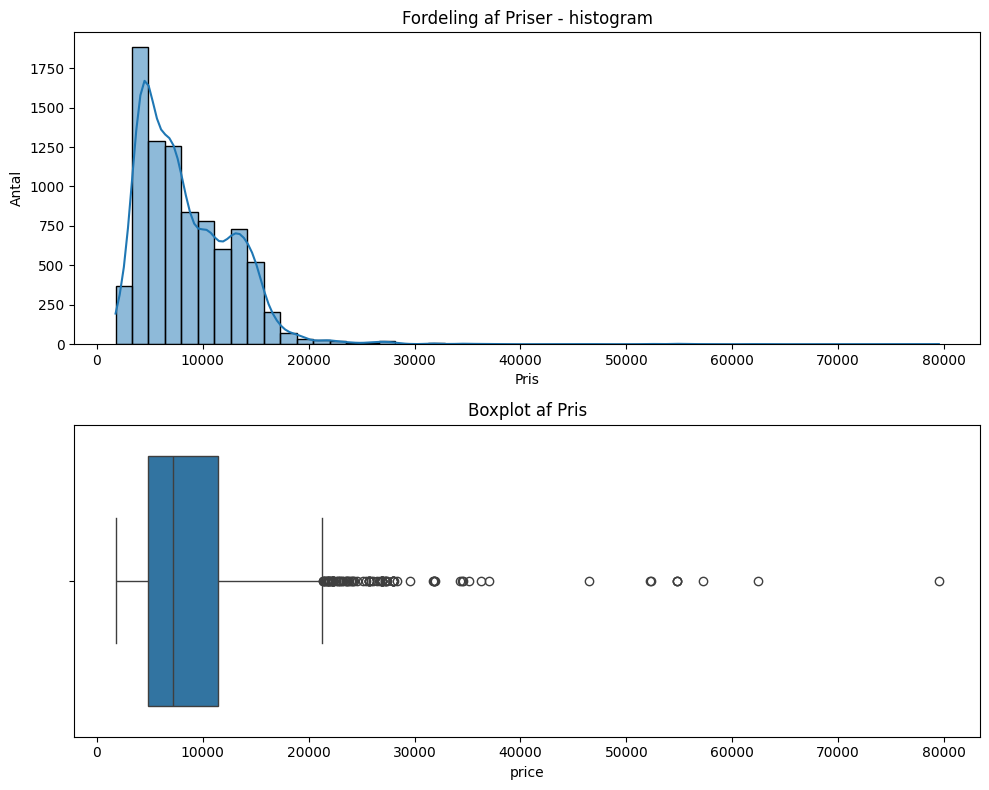

Skævhed (Skewness): 2.24303381701942
Kurtosis: 17.0167794296372
Fordelingen er højreskæv (positiv skævhed).
Fordelingen er spidsere end en normalfordeling (høj kurtosis).


In [25]:
from scipy.stats import skew, kurtosis  

plt.figure(figsize=(10, 8))

# Histogram med KDE øverst
plt.subplot(2, 1, 1)
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Fordeling af Priser - histogram')
plt.ylabel('Antal')
plt.xlabel('Pris')

# Boxplot nederst
plt.subplot(2, 1, 2)
sns.boxplot(x=df['price'])
plt.title('Boxplot af Pris')

plt.tight_layout()
plt.show()

# Beregning af skævhed og kurtosis
skewness = skew(df['price'].dropna())
kurt = kurtosis(df['price'].dropna())

print(f"Skævhed (Skewness): {skewness}")
print(f"Kurtosis: {kurt}")

if skewness > 0:
    print("Fordelingen er højreskæv (positiv skævhed).")
elif skewness < 0:
    print("Fordelingen er venstreskæv (negativ skævhed).")
else:
    print("Fordelingen er symmetrisk.")

if kurt > 3:
    print("Fordelingen er spidsere end en normalfordeling (høj kurtosis).")
elif kurt < 3:
    print("Fordelingen er fladere end en normalfordeling (lav kurtosis).")
else:
    print("Fordelingen har samme spidshed som en normalfordeling.")


Fordelingen er højreskæv (positiv skævhed), hvilket betyder, at der er flere lavere værdier, og den højre hale af fordelingen er længere.

Fordelingen har også høj kurtosis, hvilket indikerer, at dataene er spidsere end en normalfordeling, og der er flere ekstreme værdier (outliers) end vi ville forvente i en normalfordeling. Dette tyder på, at vores data kan indeholde nogle ekstreme observationer, som vi vil fjerne ved hjælp af z-score og IQR teknikkerne for at forbedre modellens præcision.

In [27]:
from datarenser import get_no_outliers_df_train

# Fjerner både IQR‑outliers og z-score‑outliers med et metodekald
df_final = get_no_outliers_df_train(df)

# Tjekker dimensioner før/efter
print(f"Før outlier-fjernelse: {df.shape}")
print(f"Efter outlier-fjernelse: {df_final.shape}")

Før outlier-fjernelse: (8682, 6)
Efter outlier-fjernelse: (8578, 6)


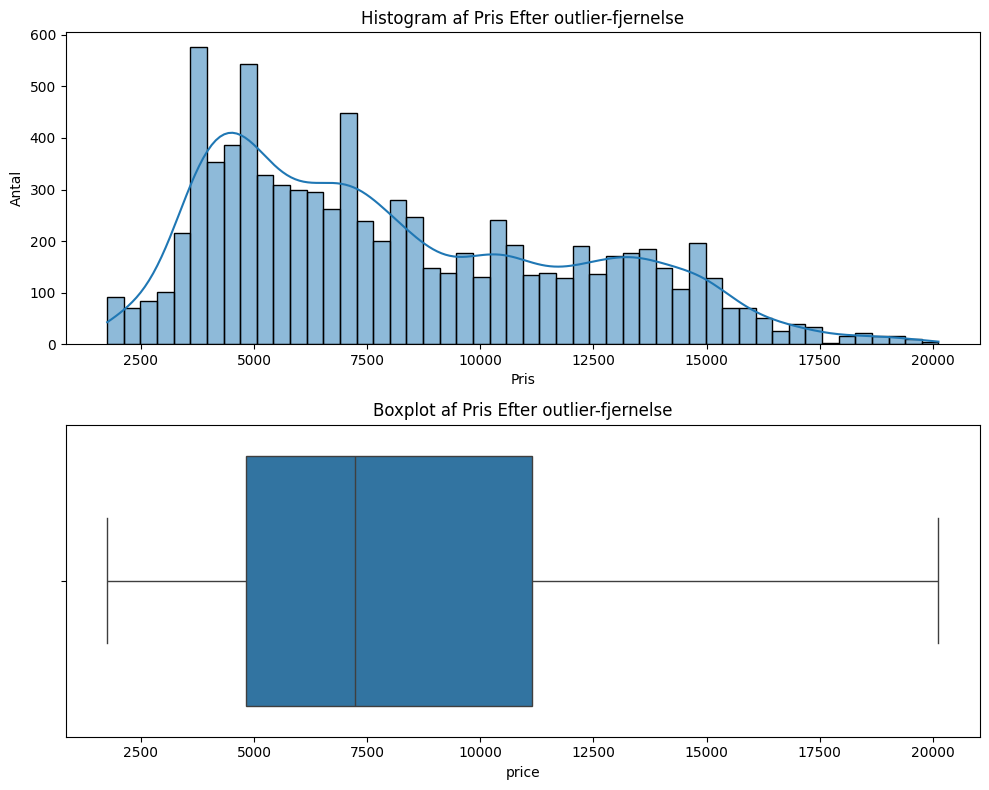

Skævhed (Skewness): 0.60
Kurtosis: -0.62
Fordelingen er højreskæv (positiv skævhed).
Fordelingen er fladere end en normalfordeling (lav kurtosis).


In [28]:
from scipy.stats import skew, kurtosis  

plt.figure(figsize=(10, 8))

# Histogram efter outlier-fjernelse
plt.subplot(2, 1, 1)
sns.histplot(df_final['price'], kde=True, bins=50)
plt.title('Histogram af Pris Efter outlier-fjernelse')
plt.xlabel('Pris')
plt.ylabel('Antal')

# Boxplot efter outlier-fjernelse
plt.subplot(2, 1, 2)
sns.boxplot(x=df_final['price'])
plt.title('Boxplot af Pris Efter outlier-fjernelse')

plt.tight_layout()
plt.show()

# Beregning af skævhed og kurtosis efter outlier-fjernelse
skewness_after = skew(df_final['price'].dropna())
kurt_after = kurtosis(df_final['price'].dropna())

print(f"Skævhed (Skewness): {skewness_after:.2f}")
print(f"Kurtosis: {kurt_after:.2f}")

if skewness_after > 0:
    print("Fordelingen er højreskæv (positiv skævhed).")
elif skewness_after < 0:
    print("Fordelingen er venstreskæv (negativ skævhed).")
else:
    print("Fordelingen er symmetrisk.")

if kurt_after > 3:
    print("Fordelingen er spidsere end en normalfordeling (høj kurtosis).")
elif kurt_after < 3:
    print("Fordelingen er fladere end en normalfordeling (lav kurtosis).")
else:
    print("Fordelingen har samme spidshed som en normalfordeling.")

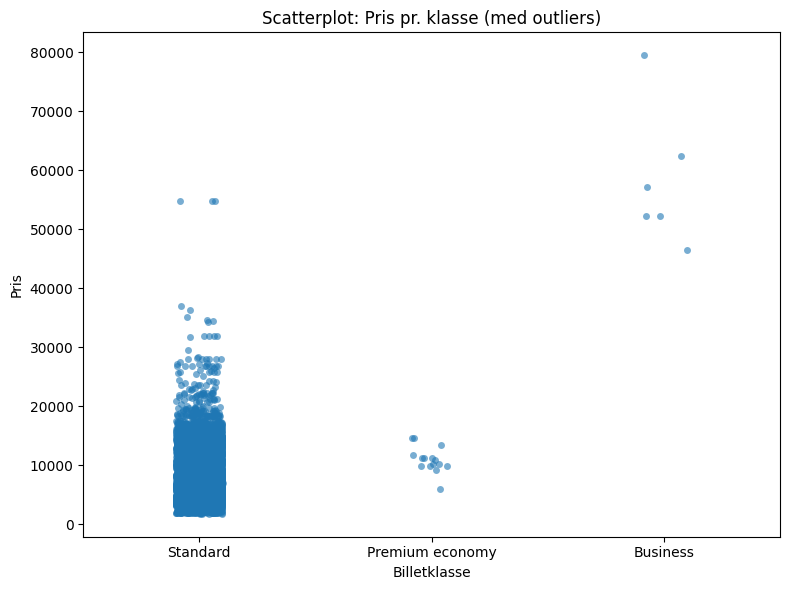

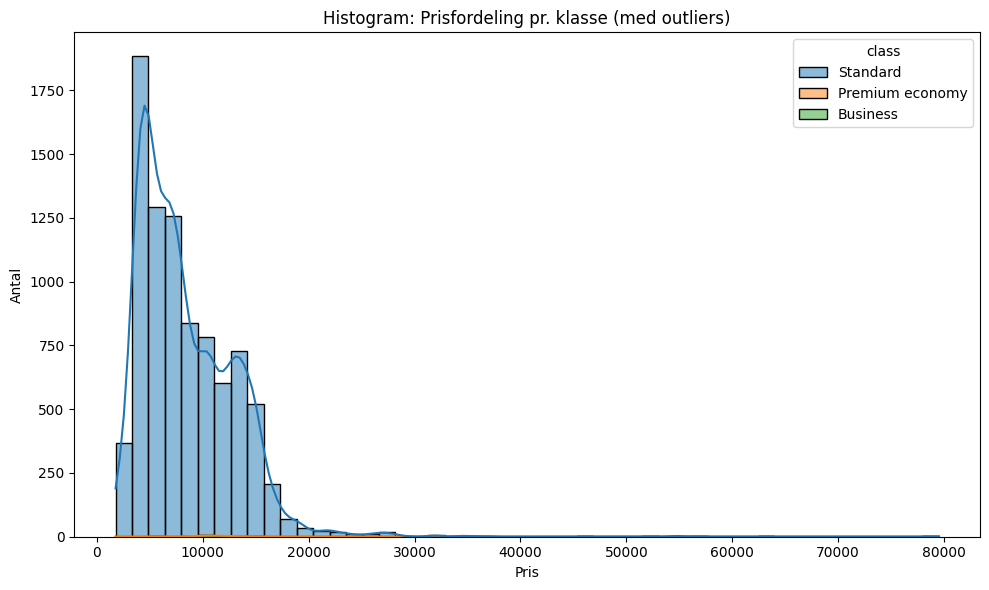

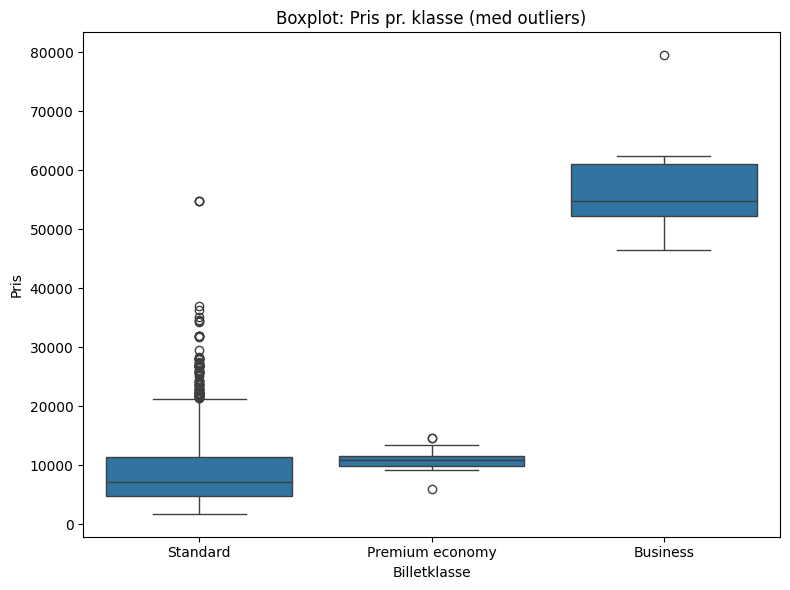

Gennemsnitspriser pr. klasse (med outliers):
Standard: 8395.81
Premium economy: 10937.53
Business: 58358.67


In [29]:
# Scatterplot: price vs class
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='class', y='price', jitter=True, alpha=0.6)
plt.title('Scatterplot: Pris pr. klasse (med outliers)')
plt.xlabel('Billetklasse')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Histogram: prisfordeling pr. klasse
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='class', bins=50, kde=True, multiple='stack')
plt.title('Histogram: Prisfordeling pr. klasse (med outliers)')
plt.xlabel('Pris')
plt.ylabel('Antal')
plt.tight_layout()
plt.show()

# Boxplot: Pris pr. klasse
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='class', y='price')
plt.title('Boxplot: Pris pr. klasse (med outliers)')
plt.xlabel('Billetklasse')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Beregner og udskriver gennemsnitspriser pr. klasse sorteret i stigende rækkefølge med outliers
mean_prices = df.groupby('class')['price'].mean().sort_values()

print("Gennemsnitspriser pr. klasse (med outliers):")
for klasse, pris in mean_prices.items():
    print(f"{klasse}: {pris:.2f}")

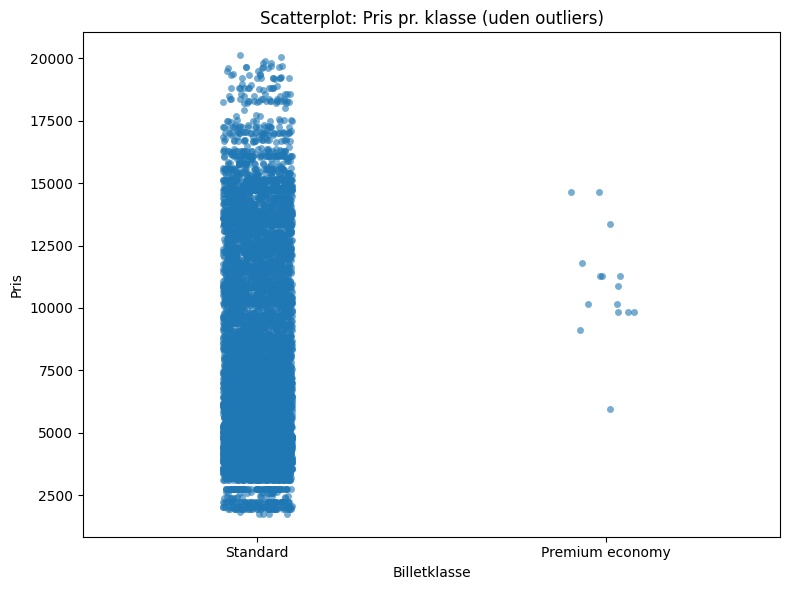

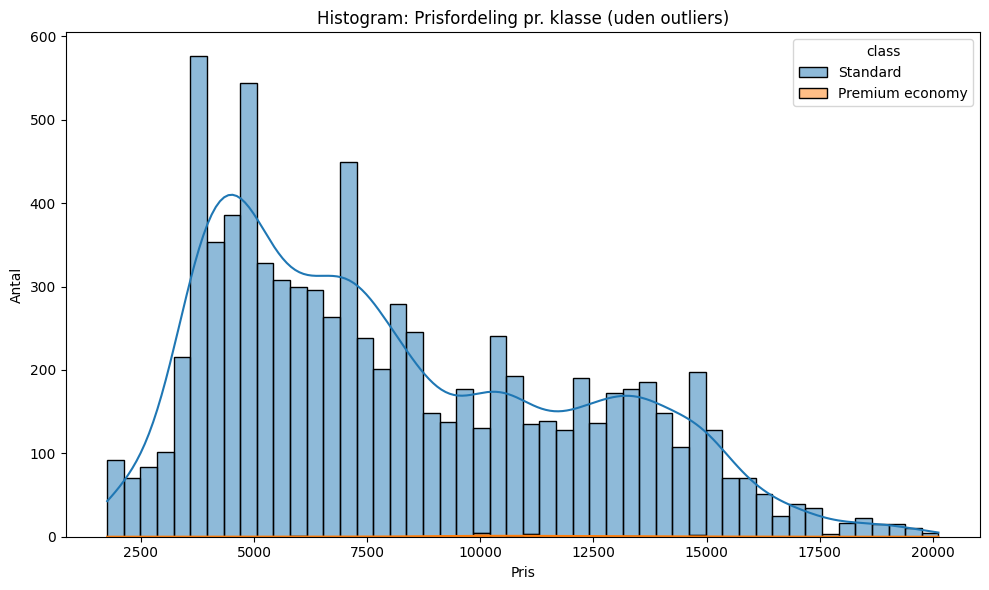

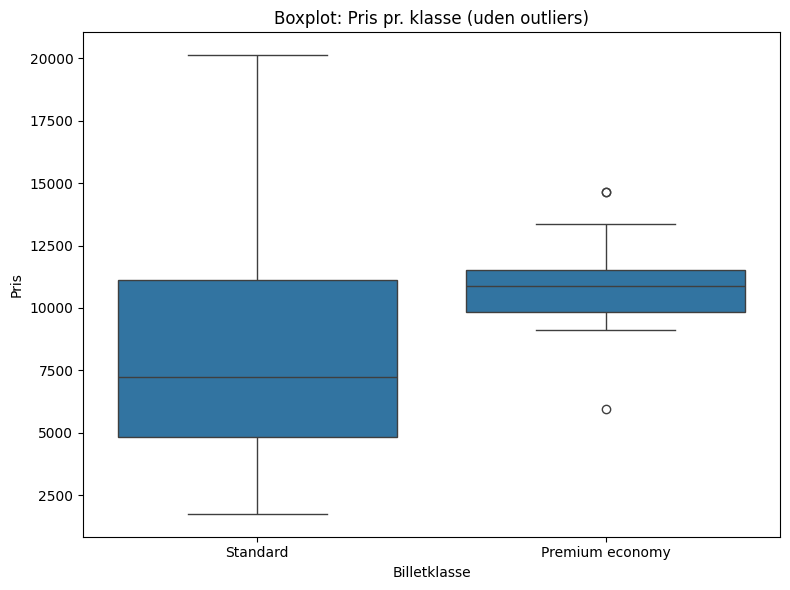

Gennemsnitspriser pr. klasse (uden outliers):
Standard: 8193.79
Premium economy: 10937.53


In [30]:
# Scatterplot: price vs class
plt.figure(figsize=(8, 6))
sns.stripplot(data=df_final, x='class', y='price', jitter=True, alpha=0.6)
plt.title('Scatterplot: Pris pr. klasse (uden outliers)')
plt.xlabel('Billetklasse')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Histogram: prisfordeling pr. klasse
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='price', hue='class', bins=50, kde=True, multiple='stack')
plt.title('Histogram: Prisfordeling pr. klasse (uden outliers)')
plt.xlabel('Pris')
plt.ylabel('Antal')
plt.tight_layout()
plt.show()

# Boxplot: Pris pr. klasse
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_final, x='class', y='price')
plt.title('Boxplot: Pris pr. klasse (uden outliers)' )
plt.xlabel('Billetklasse')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Beregner og udskriver gennemsnitspriser pr. klasse sorteret i stigende rækkefølge uden outliers
mean_prices = df_final.groupby('class')['price'].mean().sort_values()

print("Gennemsnitspriser pr. klasse (uden outliers):")
for klasse, pris in mean_prices.items():
    print(f"{klasse}: {pris:.2f}")

Under analysen blev Business-klassen fjernet som outliers på grund af deres naturligt højere priser sammenlignet med de øvrige klasser. Da disse priser er væsentlige for forståelsen af prisstrukturen, har vi valgt ikke at fjerne disse outliers for at bevare vigtig information. Derfor fortsætter vi analysen med datasættet inklusive outliers, så vi bedre kan afspejle, at Business-klassen har en højere pris end standardversionerne inden for samme flyselskab.

Resultatet viser tydeligt, at priserne varierer betydeligt mellem standard og premium-versionerne inden for samme flyselskab.

Gennemsnitsprisen for standardklassen ligger omkring 8.396, mens Premium Economy har en højere gennemsnitspris på cirka 10.938. Dette indikerer, at Premium Economy tilbyder ekstra komfort eller services, som reflekteres i den højere pris.

Business-klassen skiller sig markant ud med en gennemsnitspris på hele 58.359, hvilket er væsentligt højere end både standard og Premium Economy. Dette understreger, at Business er en premium-version med en betydeligt højere pris, som afspejler dens luksus og ekstra ydelser.

Sammenfattende viser analysen, at premium-versionerne, især Business-klassen, har en markant højere pris end standardversionerne, hvilket bekræfter, at prisniveauet stiger i takt med billetklassens premium-status inden for samme flyselskab.

Valgte kolonner til korrelationsanalyse: ['price', 'class_numb']
Beregnet korrelationsmatrix:
               price  class_numb
price       1.000000    0.237835
class_numb  0.237835    1.000000


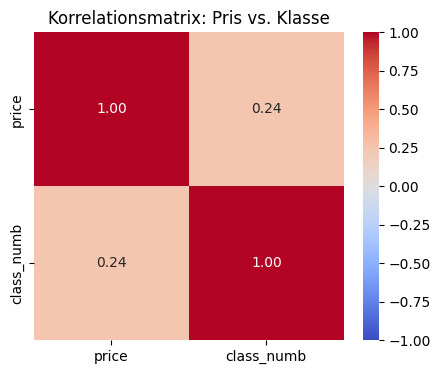

In [33]:
# Vælger de relevante kolonner til korrelationsanalyse: pris og den omkodede klasse
cols_to_corr = ['price', 'class_numb']
print("Valgte kolonner til korrelationsanalyse:", cols_to_corr)

# Beregner korrelationsmatrix for valgte variabler
corr = df[cols_to_corr].corr()
print("Beregnet korrelationsmatrix:")
print(corr)

# Visualiserer korrelationsmatrixen som heatmap
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korrelationsmatrix: Pris vs. Klasse")
plt.show()

Korrelationsmatrixen viser en svag til moderat positiv sammenhæng på omkring 0,24 mellem pris og flyklasse (class_numb). Det indikerer, at prisen typisk øges, jo højere klassen er (Standard < Premium economy < Business), men denne relation er ikke særlig stærk. Det tyder på, at der også er andre faktorer, der spiller ind på prisen.

In [35]:
avg_prices = df.groupby(['airline', 'class'])['price'].mean().unstack()
print("\nGennemsnitspriser pr. flyselskab og klasse:")
print(avg_prices)


Gennemsnitspriser pr. flyselskab og klasse:
class                                  Business  Premium economy      Standard
airline                                                                       
Air Asia                                    NaN              NaN   5439.607639
Air India                                   NaN              NaN   9462.014075
GoAir                                       NaN              NaN   5861.056701
IndiGo                                      NaN              NaN   5592.643539
Jet Airways                                 NaN              NaN  11114.544343
Jet Airways Business               58358.666667              NaN           NaN
Multiple carriers                           NaN              NaN  10856.087273
Multiple carriers Premium economy           NaN     11431.333333           NaN
SpiceJet                                    NaN              NaN   4335.841718
Trujet                                      NaN              NaN   4140.000000
Vistara

Gennemsnittene bekræfter, at Business class generelt har de højeste priser, efterfulgt af Premium economy, mens Standard class er billigst. Dog er der flyselskaber, som kun tilbyder visse klasser i datasættet, hvilket fremgår af NaN-værdierne. Eksempelvis har 'Jet Airways Business' kun Business klasse-data, mens 'Vistara Premium economy' kun har Premium economy-priser. Standard klassen er tilgængelig på alle flyselskaber og har de laveste gennemsnitspriser.

In [37]:
from sklearn.preprocessing import StandardScaler

# Tjek for manglende værdier før skalering
print("Manglende værdier før skalering:")
print(dfNumeric[['Price']].isnull().sum())

# Standard skalering af 'Price'
scaler = StandardScaler()
dfNumeric[['Price']] = scaler.fit_transform(dfNumeric[['Price']])

# Udskriv et udsnit af data efter skalering
print("\nSkalerede numeriske features + one-hot encoded kategorier (første 5 rækker):")
print(dfNumeric.head())

# Tjek middelværdi og standardafvigelse efter skalering
print("\nMiddelværdi og standardafvigelse efter skalering for 'Price':")
print(dfNumeric[['Price']].agg(['mean', 'std']))

Manglende værdier før skalering:
Price    0
dtype: int64

Skalerede numeriske features + one-hot encoded kategorier (første 5 rækker):
      Price  Class_Business  Class_Premium economy  Class_Standard  \
0 -0.985377               0                      0               1   
1 -0.167800               0                      0               1   
2  1.182884               0                      0               1   
3 -0.481367               0                      0               1   
4  1.056936               0                      0               1   

   Airline_Air Asia  Airline_Air India  Airline_GoAir  Airline_IndiGo  \
0                 0                  0              0               1   
1                 0                  1              0               0   
2                 0                  0              0               0   
3                 0                  0              0               1   
4                 0                  0              0               1   

   Ai

Den skalerede pris har en middelværdi tæt på 0 (ca. -0.00000) og en standardafvigelse omkring 1.00006. Dette indikerer, at standardiseringen er udført korrekt, så data er centreret og skaleret ensartet. Der er ingen manglende værdier i den valgte feature. Disse skalerede data er derfor velegnede til at blive brugt i regressionsmodeller, hvor ensartede og centrerede inputvariable ofte forbedrer modelpræstationen

# 4. Datamodellering

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

# Random Forest og Lineær Regression blev brugt til at forudsige priser, fordi de kan modellere sammenhængen mellem flere faktorer og prisen Random Forest håndterer komplekse mønstre, mens Lineær Regression er enkel og let at forstå.

RandomForestRegressor Regression
MSE: 0.57
RMSE: 0.76
MAE: 0.56
R²: 0.39

LinearRegression Regression
MSE: 0.57
RMSE: 0.76
MAE: 0.56
R²: 0.39

Klassefordeling
class
Standard           8661
Premium economy      15
Business              6
Name: count, dtype: Int64

Random Forest Predictions - First few rows:
          True  Predicted
1018  1.409157   0.592966
1754 -1.105896  -0.615738
5412 -0.109386   0.206900
3059 -0.264867   0.518011
3467 -0.577566  -0.615738

Linear Regression Predictions - First few rows:
          True  Predicted
1018  1.409157   0.589252
1754 -1.105896  -0.615768
5412 -0.109386   0.208654
3059 -0.264867   0.516390
3467 -0.577566  -0.615768


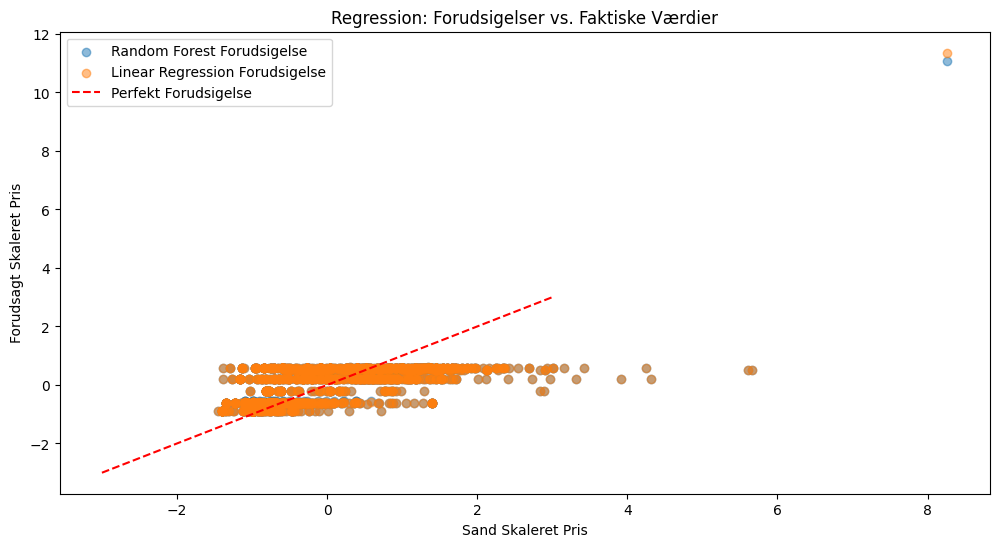


Gennemsnitlig pris per klasse og flyselskab:
class                              Business  Premium economy     Standard
airline                                                                  
Air Asia                                NaN              NaN  8155.815451
Air India                               NaN              NaN  8454.043712
GoAir                                   NaN              NaN  8475.651613
IndiGo                                  NaN              NaN  8232.488822
Jet Airways                             NaN              NaN  8711.714357
Jet Airways Business                 7365.5              NaN          NaN
Multiple carriers                       NaN              NaN  8335.247265
Multiple carriers Premium economy       NaN          10657.7          NaN
SpiceJet                                NaN              NaN  8240.619910
Trujet                                  NaN              NaN  7648.000000
Vistara                                 NaN              NaN  8797

<Figure size 1400x600 with 0 Axes>

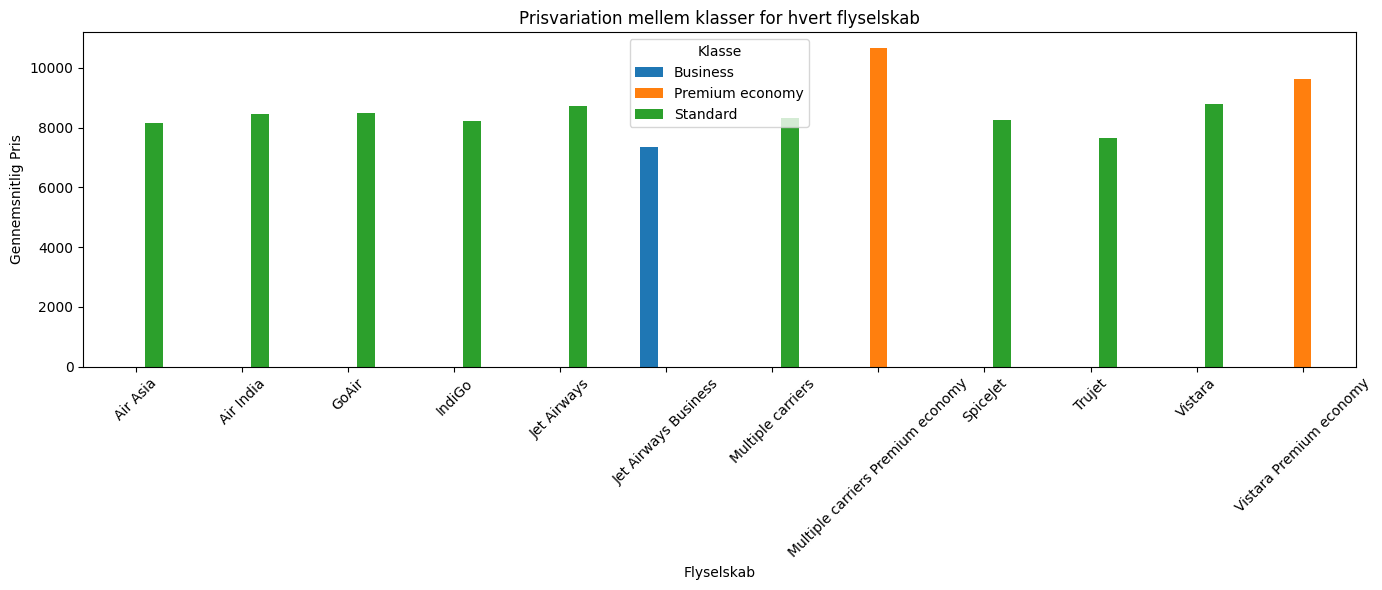

In [42]:
# Forbereder input (features) og target (pris) til regression
# Fjerner 'Price' kolonnen fra features og gemmer den som targetvariabel
X_reg = dfNumeric.drop(columns=['Price'], errors='ignore')
y_reg = dfNumeric['Price']

# Splitter data i trænings og testdatasæt
# Stratify sikrer, at fordelingen af 'class' bevares i begge datasæt
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42, stratify=df['class']
)

# Random Forest Regression 
# Initialiser og træn Random Forest-regressionsmodel på træningsdata
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_reg, y_train_reg)

# Forudsiger priser på testdatasættet
y_pred_rf = rf.predict(X_test_reg)

# Beregner evalueringsmetrikker for Random Forest-modellen
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

# Udskriver resultater for Random Forest Regression
print("RandomForestRegressor Regression")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R²: {r2_rf:.2f}\n")

# Linear Regression 
# Initialiserer og træner lineær regressionsmodel på samme træningsdata
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)

# Forudsiger priser med den lineære model på testdatasættet
y_pred_lr = lr.predict(X_test_reg)

# Beregn evalueringsmetrikker for Linear Regression-modellen
mse_lr = mean_squared_error(y_test_reg, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test_reg, y_pred_lr)
r2_lr = r2_score(y_test_reg, y_pred_lr)

# Udskriver resultater for Linear Regression
print("LinearRegression Regression")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"R²: {r2_lr:.2f}\n")

# Klassefordeling 
# Udskriver fordelingen af klasser i det oprindelige datasæt
print("Klassefordeling")
print(df['class'].value_counts())

# Udskriver de første 5 rækker af Random Forest forudsigelser (faktiske vs. forudsagte priser)
rf_comparison = pd.DataFrame({
    'True': y_test_reg, 
    'Predicted': y_pred_rf
}).head()

print("\nRandom Forest Predictions - First few rows:")
print(rf_comparison)

# Udskriver de første 5 rækker af Linear Regression forudsigelser (faktiske vs. forudsagte priser)
lr_comparison = pd.DataFrame({
    'True': y_test_reg, 
    'Predicted': y_pred_lr
}).head()

print("\nLinear Regression Predictions - First few rows:")
print(lr_comparison)

# Visualisering af forudsigelser vs. faktiske værdier 
plt.figure(figsize=(12,6))
plt.scatter(y_test_reg, y_pred_rf, alpha=0.5, label='Random Forest Forudsigelse')
plt.scatter(y_test_reg, y_pred_lr, alpha=0.5, label='Linear Regression Forudsigelse')
plt.plot([-3,3], [-3,3], 'r--', label='Perfekt Forudsigelse')  # Linje for perfekt sammenfald mellem forudsagt og sand pris
plt.xlabel('Sand Skaleret Pris')
plt.ylabel('Forudsagt Skaleret Pris')
plt.title('Regression: Forudsigelser vs. Faktiske Værdier')
plt.legend()
plt.show()

# Invers transform af skalerede priser 
# For at kunne tolke priserne i deres oprindelige skala konverteres 'Price' tilbage
df_analysis = dfNumeric.copy()
df_analysis['Price'] = scaler.inverse_transform(df_analysis[['Price']])

# Tilføjer kategoriske variable tilbage for gruppering
df_analysis['class'] = df['class']
df_analysis['airline'] = df['airline']

# Beregner gennemsnitlig pris per flyselskab og billetklasse
price_comparison = df_analysis.groupby(['airline', 'class'])['Price'].mean().unstack()

# Udskriver tabel over gennemsnitlige priser pr. klasse og flyselskab
print("\nGennemsnitlig pris per klasse og flyselskab:")
print(price_comparison)

# Visualisering af prisvariation 
plt.figure(figsize=(14,6))
price_comparison.plot(kind='bar', figsize=(14,6))
plt.title('Prisvariation mellem klasser for hvert flyselskab')
plt.ylabel('Gennemsnitlig Pris')
plt.xlabel('Flyselskab')
plt.xticks(rotation=45)
plt.legend(title='Klasse')
plt.tight_layout()
plt.show()

Der er udført regressionsmodeller (Random Forest og Lineær Regression) for at forudsige prisen på flybilletter baseret på faktorer som flyselskab og billetklasse. Datasættet er meget skævt med 8.661 observationer i Standard-klassen, men kun 15 i Premium economy og 6 i Business, hvilket påvirker modellernes præstation.

Gennemsnitspriser pr. Klasse og Flyselskab:

Business: Højere priser, men få observationer, så priserne kan variere meget.

Premium economy: Priser mellem ca. 9.600 og 11.400.

Standard: Priser mellem ca. 4.000 og 9.000.

Modelpræstation:

Begge modeller giver næsten identiske resultater:

MSE: 0.57

RMSE: 0.76

MAE: 0.56

R²: 0.39 (forklarer 39% af variationen i priserne).

Forudsigelser vs. faktiske værdier viser en tæt korrelation mellem de forudsagte og faktiske priser, især i Standard-klassen.

Prisvariation mellem klasser for hvert flyselskab viser forskelle i gennemsnitspriser.

Klassefordeling:

Standard           8661
Premium economy      15
Business              6

Modellerne fanger en del af prisvariationerne, men den lave R²-værdi indikerer, at der er flere faktorer, som ikke fanges. Den skæve klassefordeling, især for Business og Premium economy, påvirker præstationen. Forbedringer kan inkludere metoder til at håndtere den skæve klassefordeling.

# KMeans Clustering blev brugt, fordi den effektivt opdeler data i grupper baseret på ligheder og hjælper med at afsløre skjulte mønstre uden at skulle kende kategorierne på forhånd.

Silhouette Scores for k=2..6: [0.41700180027574935, 0.5197296615114363, 0.7123653018427133, 0.7705862734896026, 0.9294628888094413]
Bedste antal klynger ift. Silhouette score: 6


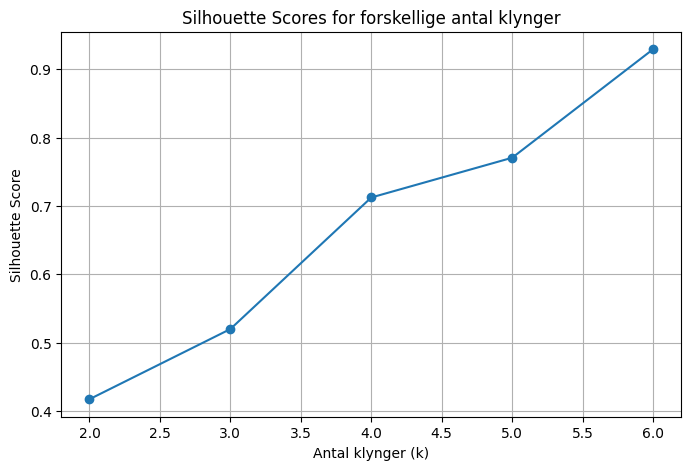

Silhouette Score for k=6: 0.929


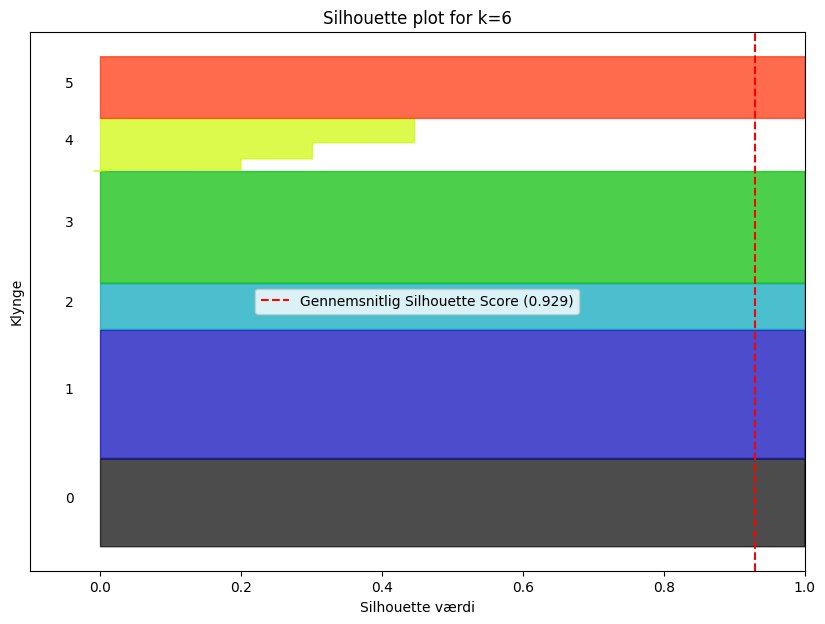

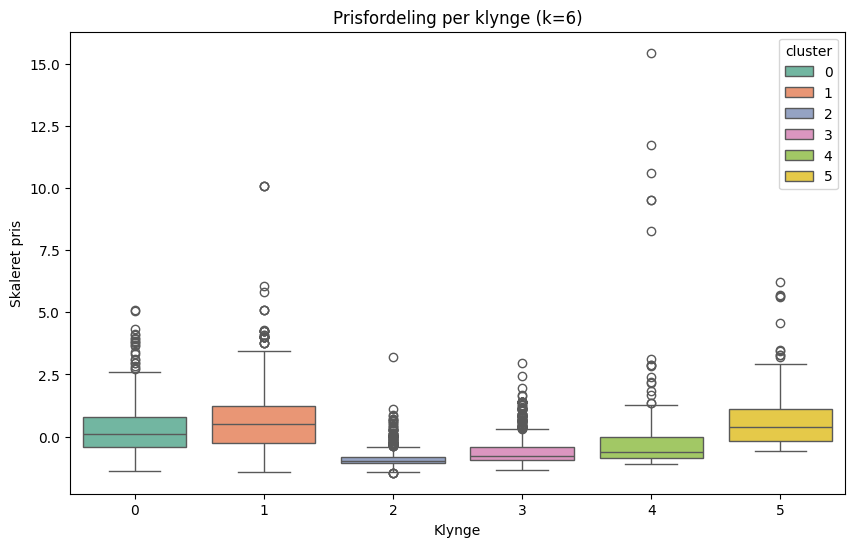


Opsummering af prisfordeling per klynge (skaleret pris):
Klynge 0:
  Antal observationer: 1563
  Pris - gennemsnit: 0.223
  Pris - median: 0.116
  Pris - min: -1.386
  Pris - max: 5.105

Klynge 1:
  Antal observationer: 2289
  Pris - gennemsnit: 0.582
  Pris - median: 0.523
  Pris - min: -1.432
  Pris - max: 10.074

Klynge 2:
  Antal observationer: 815
  Pris - gennemsnit: -0.890
  Pris - median: -0.991
  Pris - min: -1.450
  Pris - max: 3.221

Klynge 3:
  Antal observationer: 1989
  Pris - gennemsnit: -0.617
  Pris - median: -0.776
  Pris - min: -1.348
  Pris - max: 2.979

Klynge 4:
  Antal observationer: 926
  Pris - gennemsnit: -0.331
  Pris - median: -0.613
  Pris - min: -1.097
  Pris - max: 15.435

Klynge 5:
  Antal observationer: 1100
  Pris - gennemsnit: 0.526
  Pris - median: 0.383
  Pris - min: -0.573
  Pris - max: 6.199



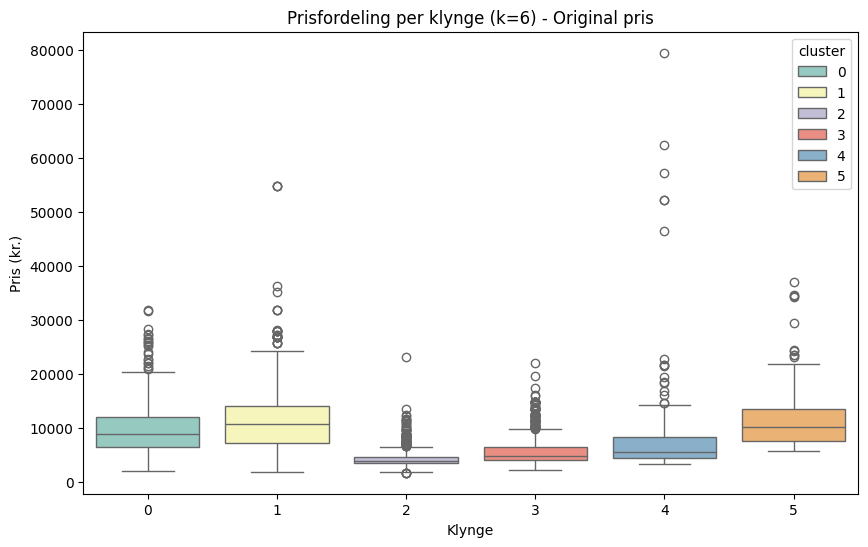


Opsummering af prisfordeling per klynge (original pris):
Klynge 0:
  Antal observationer: 1563
  Pris - gennemsnit: 9462.01 kr.
  Pris - median: 8971.00 kr.
  Pris - min: 2050.00 kr.
  Pris - max: 31945.00 kr.

Klynge 1:
  Antal observationer: 2289
  Pris - gennemsnit: 11114.54 kr.
  Pris - median: 10844.00 kr.
  Pris - min: 1840.00 kr.
  Pris - max: 54826.00 kr.

Klynge 2:
  Antal observationer: 815
  Pris - gennemsnit: 4335.84 kr.
  Pris - median: 3873.00 kr.
  Pris - min: 1759.00 kr.
  Pris - max: 23267.00 kr.

Klynge 3:
  Antal observationer: 1989
  Pris - gennemsnit: 5592.64 kr.
  Pris - median: 4862.00 kr.
  Pris - min: 2227.00 kr.
  Pris - max: 22153.00 kr.

Klynge 4:
  Antal observationer: 926
  Pris - gennemsnit: 6912.36 kr.
  Pris - median: 5613.00 kr.
  Pris - min: 3383.00 kr.
  Pris - max: 79512.00 kr.

Klynge 5:
  Antal observationer: 1100
  Pris - gennemsnit: 10856.09 kr.
  Pris - median: 10197.00 kr.
  Pris - min: 5797.00 kr.
  Pris - max: 36983.00 kr.


Andel af billet

In [45]:
# Fjerner 'Price' kolonnen, da den er targetvariablen og ikke bruges som feature til clustering
X_clust = dfNumeric.drop(columns=['Price'], errors='ignore')

sil_scores = []  # Liste til at gemme Silhouette scores
K_range = range(2, 7)  # Test antal klynger fra 2 til 6

# Looper gennem mulige k for KMeans og beregn Silhouette score for hver
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  
    labels = kmeans.fit_predict(X_clust)            
    sil = silhouette_score(X_clust, labels)         
    sil_scores.append(sil)                           

# Bestemmer bedste k baseret på højeste Silhouette score
best_k = K_range[np.argmax(sil_scores)]

# Udskriver Silhouette scores for alle k og det bedste antal klynger
print("Silhouette Scores for k=2..6:", sil_scores)
print(f"Bedste antal klynger ift. Silhouette score: {best_k}")

# Plotter Silhouette scores for hvert k
plt.figure(figsize=(8, 5))
plt.plot(list(K_range), sil_scores, marker='o')
plt.title('Silhouette Scores for forskellige antal klynger')
plt.xlabel('Antal klynger (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Træner KMeans med det bedste antal klynger
kmeans_best = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans_best.fit_predict(X_clust)

# Tilføjer cluster labels til data for yderligere analyse
dfNumeric['cluster'] = clusters

# Evaluerer clustering med Silhouette score
sil_score_final = silhouette_score(X_clust, clusters)
print(f"Silhouette Score for k={best_k}: {sil_score_final:.3f}")

# Beregner Silhouette værdier pr. observation til visualisering
silhouette_vals = silhouette_samples(X_clust, clusters)

# Visualiserer Silhouette værdier for hver klynge
y_lower = 10
plt.figure(figsize=(10, 7))
for i in range(best_k):
    ith_cluster_silhouette_vals = silhouette_vals[clusters == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    # Vælger farve til klyngen baseret på position
    color = cm.nipy_spectral(float(i) / best_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Tilføjer klyngenummer som tekst på plottet
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # Opdater y-position til næste klynge

# Tilføjer titler og labels til Silhouette plot
plt.title(f'Silhouette plot for k={best_k}')
plt.xlabel('Silhouette værdi')
plt.ylabel('Klynge')

# Markerer den gennemsnitlige Silhouette score med en stiplet rød linje
plt.axvline(x=sil_score_final, color="red", linestyle="--", label=f"Gennemsnitlig Silhouette Score ({sil_score_final:.3f})")
plt.legend()
plt.yticks([])
plt.xlim([-0.1, 1])
plt.show()

# Visualiserer prisfordeling per klynge (skaleret pris)
plt.figure(figsize=(10,6))
sns.boxplot(x='cluster', y='Price', data=dfNumeric, hue='cluster', palette='Set2', dodge=False)
plt.title(f'Prisfordeling per klynge (k={best_k})')
plt.xlabel('Klynge')
plt.ylabel('Skaleret pris')
plt.show()

# Udskriver statistik for prisfordeling inden for hver klynge
print("\nOpsummering af prisfordeling per klynge (skaleret pris):")
for cluster_num in range(best_k):
    cluster_data = dfNumeric[dfNumeric['cluster'] == cluster_num]['Price']
    print(f"Klynge {cluster_num}:")
    print(f"  Antal observationer: {len(cluster_data)}")
    print(f"  Pris - gennemsnit: {cluster_data.mean():.3f}")
    print(f"  Pris - median: {cluster_data.median():.3f}")
    print(f"  Pris - min: {cluster_data.min():.3f}")
    print(f"  Pris - max: {cluster_data.max():.3f}\n")

# Genskaber originale priser for bedre fortolkning
dfNumeric['Price_original'] = scaler.inverse_transform(dfNumeric[['Price']])

# Visualiserer prisfordeling pr. klynge med originale priser
plt.figure(figsize=(10,6))
sns.boxplot(x='cluster', y='Price_original', data=dfNumeric, hue='cluster', palette='Set3', dodge=False)
plt.title(f'Prisfordeling per klynge (k={best_k}) - Original pris')
plt.xlabel('Klynge')
plt.ylabel('Pris (kr.)')
plt.show()

# Udskriver statistik over prisfordeling pr. klynge baseret på originale priser
print("\nOpsummering af prisfordeling per klynge (original pris):")
for cluster_num in range(best_k):
    cluster_data = dfNumeric[dfNumeric['cluster'] == cluster_num]['Price_original']
    print(f"Klynge {cluster_num}:")
    print(f"  Antal observationer: {len(cluster_data)}")
    print(f"  Pris - gennemsnit: {cluster_data.mean():.2f} kr.")
    print(f"  Pris - median: {cluster_data.median():.2f} kr.")
    print(f"  Pris - min: {cluster_data.min():.2f} kr.")
    print(f"  Pris - max: {cluster_data.max():.2f} kr.\n")

# Tilføj cluster labels til den oprindelige df
df['cluster'] = dfNumeric['cluster']

# Der bruges pd.crosstab for at få et klart overblik over fordelingen af kategorier i hver klynge.
print("\nAndel af billettyper (Class) pr. klynge:")
print(pd.crosstab(df['cluster'], df['class'], normalize='index'))

print("\nAndel af flyselskaber (Airline) pr. klynge:")
print(pd.crosstab(df['cluster'], df['airline'], normalize='index'))

Klyngeanalyse med k = 6
Opdelingen i 6 klynger giver en meget høj Silhouette-score på 0,929, hvilket viser, at klyngerne er klart adskilte fra hinanden, og at observationerne passer godt sammen inden for hver klynge. Det betyder, at denne opdeling af dataene fungerer rigtig godt, og at hver gruppe er godt defineret.

Prisfordeling (Skaleret pris)
Klynge 1 og 5
Har de højeste gennemsnitspriser, hvilket tyder på, at de repræsenterer de dyreste billetkategorier.

Klynge 2 og 3
Har de laveste gennemsnits- og medianpriser og kan derfor betegnes som økonomisegmentet med de billigste billetter.

Klynge 4
Viser stor variation i priserne og har den højeste enkeltpris på hele 79.512 kr. Det skyldes sandsynligvis, at der er enkelte Business Class-billetter i denne gruppe. Derfor dækker klyngen formentlig over særlige eller mere eksklusive billetter, snarere end bare tilfældige ekstreme værdier.

Klynge 0
Har en mellempris og kan opfattes som et mellemsegment – hverken de billigste eller dyreste billetter.

Prisfordeling (Original pris)
Prisniveauerne i de oprindelige (uskalerede) data følger samme mønster:

Klynge 1 og 5
Har gennemsnitspriser på over 10.000 kr., hvilket bekræfter, at disse hører til de dyreste segmenter.

Klynge 2 og 3
Ligger under 6.000 kr. i gennemsnit og er derfor klart de billigste segmenter.

Klynge 4
Har den samme meget høje maksimumspris som tidligere nævnt (79.512 kr.), sandsynligvis pga. enkelte Business Class-billetter.

Fordeling af billettyper og flyselskaber
Standard Class
Dominerer klart i alle klynger ofte med over 99 % af billetterne.

Business og Premium Economy
Forekommer kun i meget få tilfælde, men deres tilstedeværelse i fx klynge 1 og 4 kan forklare de højere priser i disse grupper.

Flyselskaber
Jet Airways og IndiGo er de mest hyppige flyselskaber i alle klynger.
Fordelingen mellem flyselskaberne er nogenlunde jævn, dog med små forskelle fra klynge til klynge.

# Decision Tree Classifier blev valgt til klassificering, fordi den er enkel, kan arbejde med både numeriske og kategoriske data, og identificerer mønstre uden behov for omfattende forbehandling.

DecisionTreeClassifier
Accuracy: 1.00
F1-Score (weighted): 1.00
F1-Score per class: [1. 1. 1.]
Confusion Matrix (labels = ['Business', 'Premium economy', 'Standard']):
[[   1    0    0]
 [   0    3    0]
 [   0    0 1733]]


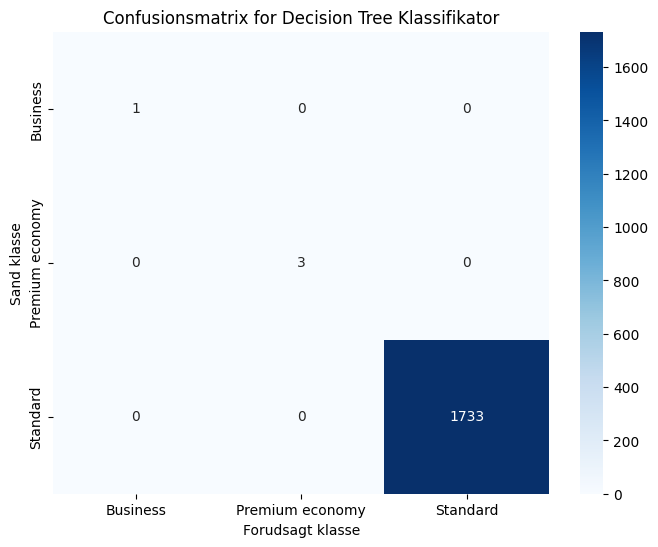

In [48]:
X_clf = df.drop(columns=['price', 'class'])
y_clf = df['class']

# Splitter data i train/test med stratificering for at bevare klassefordeling
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

# One-hot encoder kategoriske variable i både træning og test sæt
X_train_clf = pd.get_dummies(X_train_clf, drop_first=True)
X_test_clf = pd.get_dummies(X_test_clf, drop_first=True)

# Reindexer test sættet så kolonner matcher træningssættet (fyld med 0 hvor mangler)
X_test_clf = X_test_clf.reindex(columns=X_train_clf.columns, fill_value=0)

# Træner Decision Tree classifier direkte på ubalanceret træningsdata
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_clf, y_train_clf)

# Forudsiger på testdata (ubalance bibeholdt)
y_pred_clf = dtc.predict(X_test_clf)

# Evaluerer modelens accuracy
accuracy = accuracy_score(y_test_clf, y_pred_clf)

# Beregner F1-score
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')  # Vægtet gennemsnit af F1-scoren
f1_per_class = f1_score(y_test_clf, y_pred_clf, average=None, labels=sorted(y_clf.unique()))  # F1-score per klasse

# Sørger for at klasserne i confusion matrix matcher eksisterende klasser i y_test_clf
labels = sorted(y_clf.unique())  # find alle klasser automatisk

cm = confusion_matrix(y_test_clf, y_pred_clf, labels=labels)

# Udskriver resultater
print("DecisionTreeClassifier")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score (weighted): {f1:.2f}")
print(f"F1-Score per class: {f1_per_class}")
print(f"Confusion Matrix (labels = {labels}):")
print(cm)

# Viser confusion matrix som heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Forudsagt klasse')
plt.ylabel('Sand klasse')
plt.title('Confusionsmatrix for Decision Tree Klassifikator')
plt.show()

Datasættet indeholder en meget skæv klassefordeling:

Standard: 8.661 observationer

Premium economy: 15 observationer

Business: 6 observationer

Datasættet blev opdelt i trænings og testdata med en 80/20-fordeling, hvor klassefordelingen blev sikret til at være ens i begge sæt.

En Decision Tree Classifier blev anvendt til at forudsige billetklassen (class) baseret på øvrige variable (alle undtagen price og class).

Modellen blev evalueret på testdata:

Accuracy: 1.00

F1-score (vægtet): 1.00

F1-score per klasse: [1.00, 1.00, 1.00]

Confusion matrix viste, at alle testobservationer blev klassificeret korrekt inklusive:

1 observation i Business

3 observationer i Premium economy

1.733 observationer i Standard

Selvom resultatet umiddelbart virker perfekt, er der væsentlige forbehold:

Overfitting:
Den høje nøjagtighed og F1-score kan skyldes, at modellen har lært træningsdataene "for godt", især fordi Decision Trees er tilbøjelige til overfitting, hvis de ikke begrænses.

Ubalanceret datasæt:
Den ekstreme ubalance mellem klasserne betyder, at modellen i praksis ser meget få eksempler på de mindre klasser, hvilket gør evalueringen ustabil og upålidelig for disse.

F.eks. er Business repræsenteret med kun en testobservation.

Det betyder, at en korrekt forudsigelse giver en kunstig F1-score på 1.00 for denne klasse uden at det reelt siger noget om modellens evne til at generalisere.

Bias mod majoritetsklassen:
Selvom alle klasser blev korrekt forudsagt her, ville selv en lille fejlrate hurtigt favorisere Standard-klassen, da den udgør 99% af data. Det gør det vigtigt at måle per-klasse performance og ikke kun vægtet gennemsnit.

Forslag til forbedring:
SMOTE (Synthetic Minority Over-sampling Technique) bør overvejes for at balancere klasserne i træningsdata. Det vil:

Generere syntetiske eksempler for underrepræsenterede klasser

Øge chancen for, at modellen lærer meningsfulde mønstre for alle klasser.

Alternativt kan man:

Undersample Standard-klassen

På grund af tidsbegrænsninger blev SMOTE og andre metoder til håndtering af den skæve klassefordeling ikke implementeret i dette projekt.

Selvom modellen viser 100% nøjagtighed, kan det ikke tolkes som et tegn på reel høj præcision, især for de små klasser. Resultaterne bør suppleres med balancerede datasæt eller mere robuste modeller, før man drager sikre konklusioner om modelens evne til at forudsige billetklasser retvisende.